In [216]:
from IPython.display import Audio
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Fs, y = scipy.io.wavfile.read('train_bird.wav')
Audio(y, rate=Fs)

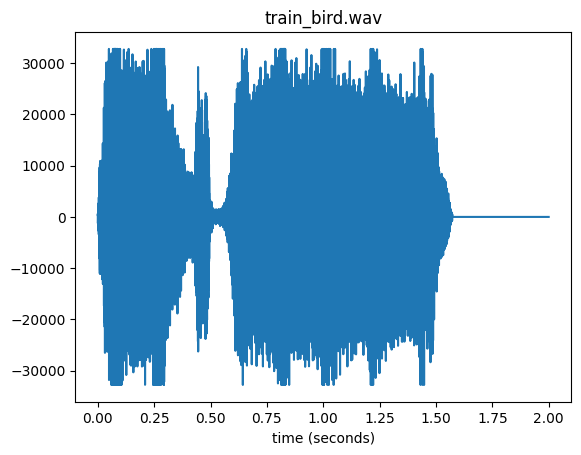

In [217]:
seconds=2
N = seconds * Fs
t = np.arange(N)/Fs
y = np.pad(y, (0, N - len(y)), 'constant', constant_values=(0, 0))

plt.plot(t, y)
plt.xlabel('time (seconds)')
plt.title('train_bird.wav')
plt.show()

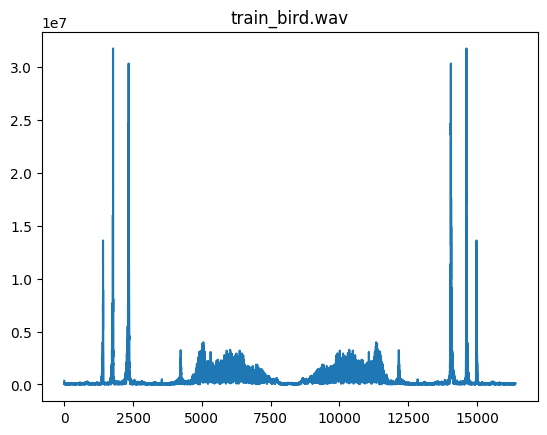

In [218]:
f = np.arange(N) / N * 2 * Fs
Y = scipy.fft.fft(y)
plt.plot(f, np.abs(Y))
plt.title('train_bird.wav')
plt.show()

In [219]:
# Low pass filter
Q = np.ones_like(Y)
for i in range(4500, 10000):
    Q[i] = 0
    Q[-i] = 0
Y_LP = Y * Q
y_filtered = np.real(scipy.fft.ifft(Y_LP))
Audio(y_filtered, rate=Fs)

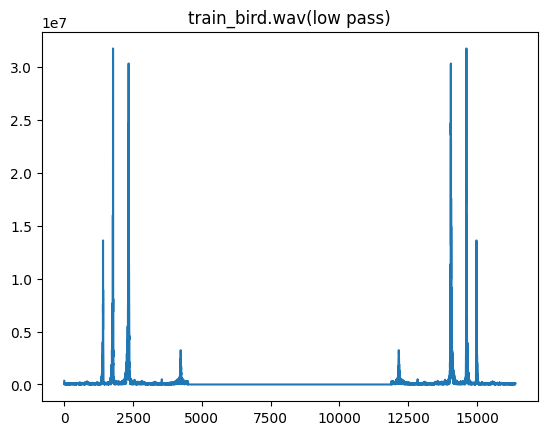

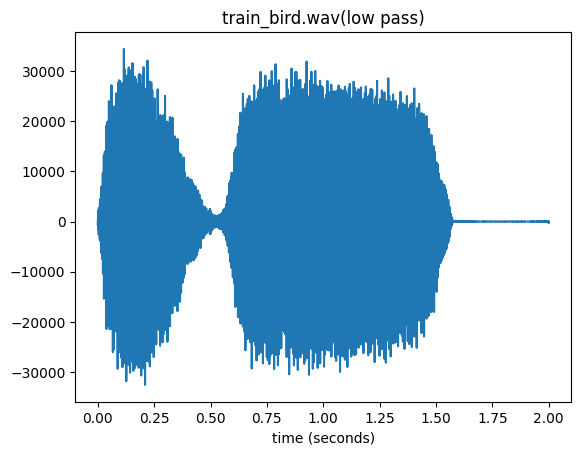

In [220]:
Y_LP = scipy.fft.fft(y_filtered)
plt.plot(f, np.abs(Y_LP))
plt.title('train_bird.wav(low pass)')
plt.show()

plt.plot(t, y_filtered)
plt.xlabel('time (seconds)')
plt.title('train_bird.wav(low pass)')
plt.show()

In [221]:
# High pass filter
Q = np.ones_like(Y)
for i in range(0, 4500):
    Q[i] = 0
    Q[-i] = 0
Y_HP = Y * Q
y_filtered = np.real(scipy.fft.ifft(Y_HP))
Audio(y_filtered, rate=Fs)

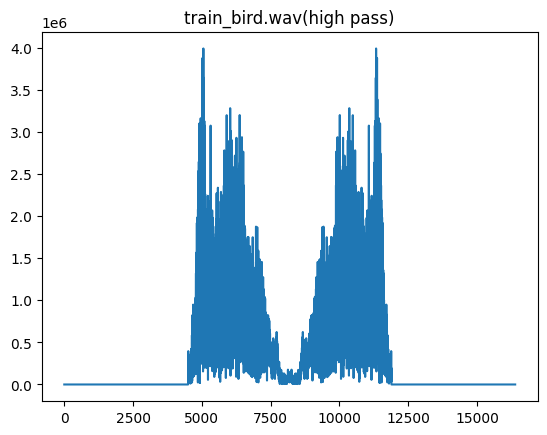

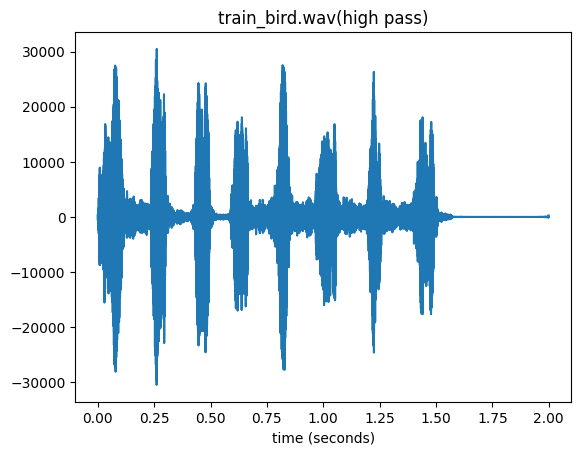

In [222]:
Y_HP = scipy.fft.fft(y_filtered)
plt.plot(f, np.abs(Y_HP))
plt.title('train_bird.wav(high pass)')
plt.show()

plt.plot(t, y_filtered)
plt.xlabel('time (seconds)')
plt.title('train_bird.wav(high pass)')
plt.show()